In [ ]:
import pandas as pd
import numpy as np
from nelson_siegel_curvature import nsc, nsc_histo, nsc_comps

In [14]:
tbond_daiy = pd.read_csv('TBond_curve.csv', index_col="Date")
tbond_daiy.index = pd.to_datetime(tbond_daiy.index)
tbond_daiy = tbond_daiy.drop(['20 Yr', '30 Yr', '1.5 Month'], axis=1)
tbond_daiy = tbond_daiy.interpolate(axis=1)
tbond_daiy = tbond_daiy.dropna(axis=0)

In [15]:
maturities = np.unique([
    int(col.split()[0]) / 12 if "Mo" in col else int(col.split()[0])
    for col in tbond_daiy.columns
])

curve_maturities = np.arange(start=maturities.min(), stop=maturities.max()+maturities.min(), step=maturities.min()).round(4)

# Define parameter bounds for optimization: 
bounds = [(0, 1), (-1, 1), (-1, 1), (0, 2)] # Intercept (β0), Slope (β1), Curvature (β2), and Decay Factor (λ)
x0 = [0.01, 0.01, 0.01, 0.5] # Initial guess for the optimization algorithm
method = 'Nelder-Mead' # Optimization method used for minimization

# Aggregate daily bond yields to weekly frequency using median
yields_weekly = tbond_daiy.resample('W').median()
# Keep only the last observation of the dataset
yields_today = tbond_daiy.iloc[-1].to_frame().T

Fitting Nelson-Siegel: 0it [00:00, ?it/s]c:\Users\Matteo\Documents\GitHub local\Nelson_Siegel_Curvature\nelson_siegel.py:29: RuntimeWarning: divide by zero encountered in divide
  P[1] * ((1 - np.exp(-T / P[3])) / (T / P[3])) +
c:\Users\Matteo\Documents\GitHub local\Nelson_Siegel_Curvature\nelson_siegel.py:30: RuntimeWarning: divide by zero encountered in divide
  P[2] * (((1 - np.exp(-T / P[3])) / (T / P[3])) - np.exp(-T / P[3])))
c:\Users\Matteo\Documents\GitHub local\Nelson_Siegel_Curvature\nelson_siegel.py:29: RuntimeWarning: divide by zero encountered in divide
  P[1] * ((1 - np.exp(-T / P[3])) / (T / P[3])) +
c:\Users\Matteo\Documents\GitHub local\Nelson_Siegel_Curvature\nelson_siegel.py:30: RuntimeWarning: divide by zero encountered in divide
  P[2] * (((1 - np.exp(-T / P[3])) / (T / P[3])) - np.exp(-T / P[3])))
c:\Users\Matteo\Documents\GitHub local\Nelson_Siegel_Curvature\nelson_siegel.py:29: RuntimeWarning: divide by zero encountered in divide
  P[1] * ((1 - np.exp(-T / P[3])

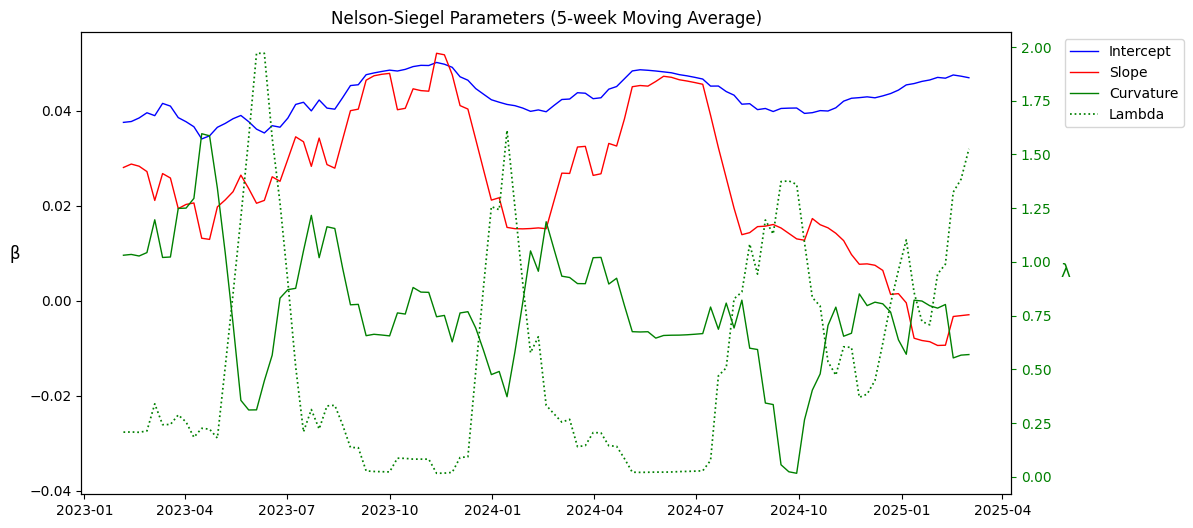

In [ ]:
# Initialisation du modèle
ns_fitter = nsc(maturities=maturities, bounds=bounds, x0=x0, method=method)

# Ajustement des paramètres Nelson-Siegel
ns_param_df = ns_fitter.fit(yields=yields_weekly)
nsc_histo(ns_param_df)

Fitting Nelson-Siegel: 1it [00:00, 49.73it/s]


c:\Users\Matteo\Documents\GitHub local\Nelson_Siegel_Curvature\nelson_siegel.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (P[0] +
c:\Users\Matteo\Documents\GitHub local\Nelson_Siegel_Curvature\nelson_siegel.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  P[1] * ((1 - np.exp(-T / P[3])) / (T / P[3])) +
c:\Users\Matteo\Documents\GitHub local\Nelson_Siegel_Curvature\nelson_siegel.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

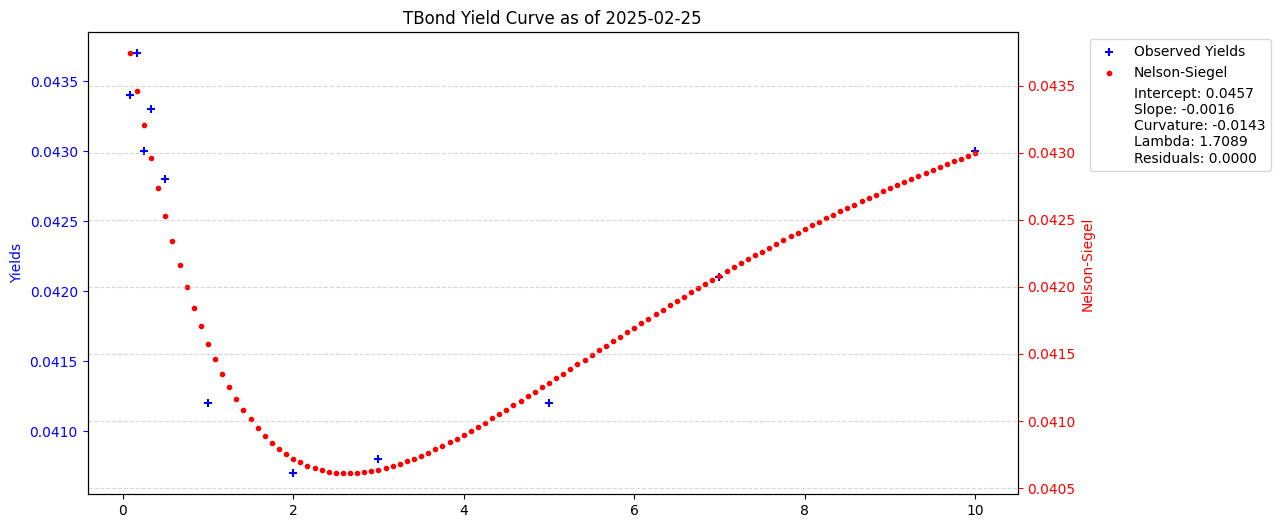

In [ ]:
# Ajustement des paramètres Nelson-Siegel
ns_params_df = ns_fitter.fit(yields=yields_today)
ns_curve_df = ns_fitter.generate_curve(curve_maturities)
nsc_comps(yields_today, maturities, ns_curve_df, curve_maturities, ns_params_df.iloc[0].to_list())